<a href="https://colab.research.google.com/github/pachterlab/FLP_2024/blob/main/Virial_plots_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code to reproduce figures 1 and 2 from the paper "The virial theorem and the Price equation" by Catherine Felce, Steinunn Liorsdóttir and Lior Pachter

In [8]:
import numpy as np
import matplotlib.pyplot as plt

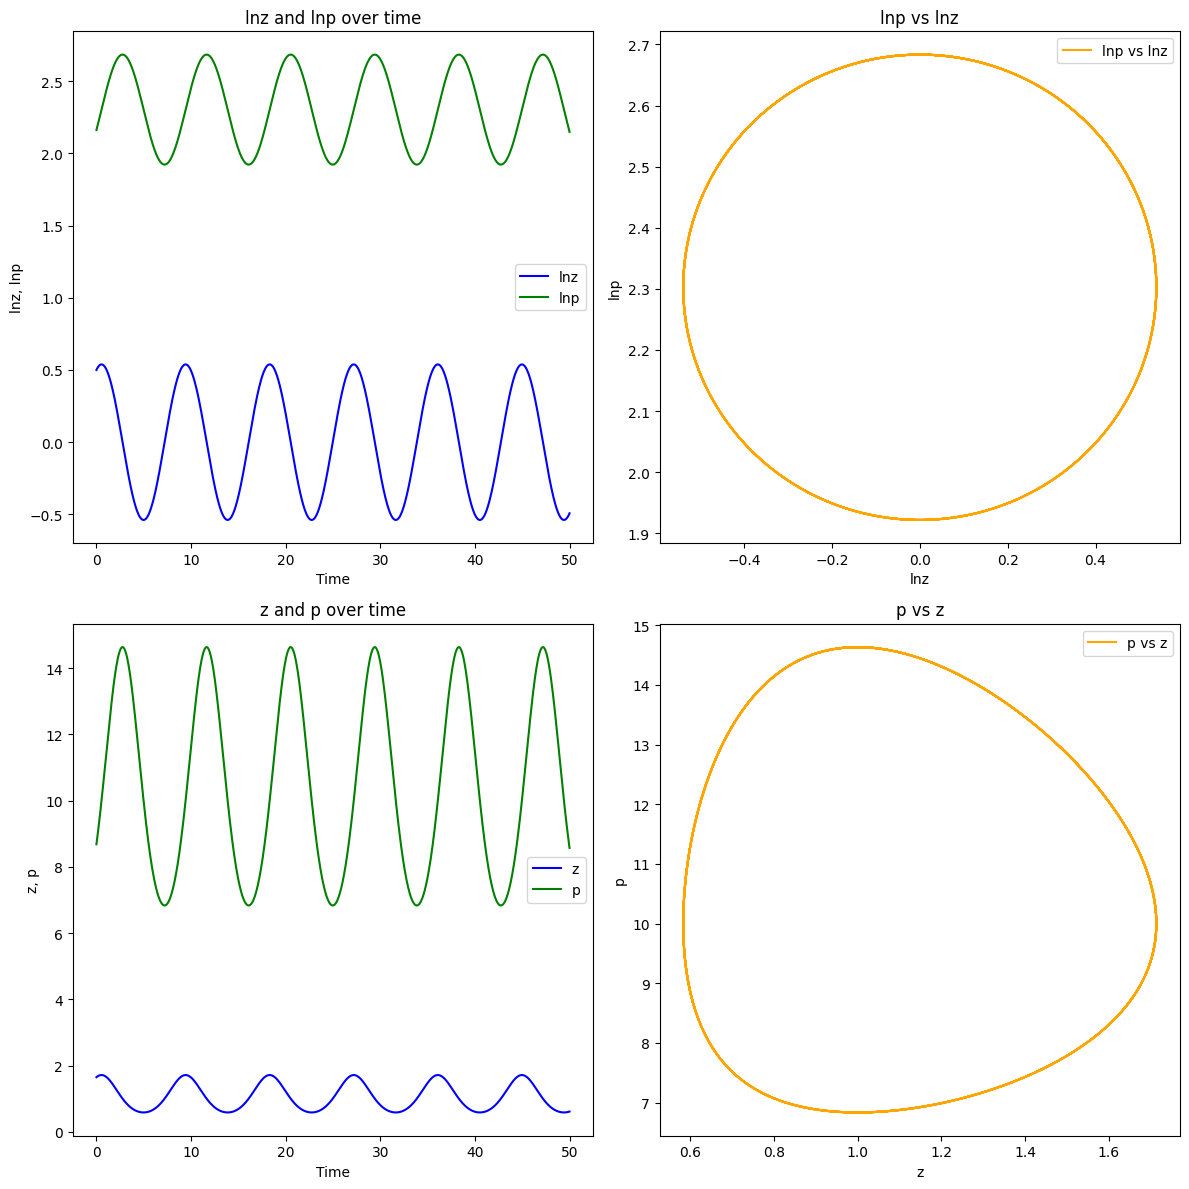

In [7]:
# Figure 1

# Input parameters
k = 0.5  # Spring constant-like parameter
z0 = 1.0  # Initial value for z
p0 = 10.0  # Initial value for p
m = 1.0  # Mass-like parameter

# Derived parameters
omega = np.sqrt(k / m)  # Angular frequency

# Time array
t = np.linspace(0, 50, 1000)  # Time from 0 to 50 with 1000 points

# Initial conditions
A = 0.5  # Amplitude for lnz
B = 0.2  # Phase constant for lnz
C = -k * B / omega  # Derived amplitude for lnp
D = k * A / omega  # Derived phase constant for lnp

# Solutions for lnz and lnp
lnz = A * np.cos(omega * t) + B * np.sin(omega * t) + np.log(z0)
lnp = C * np.cos(omega * t) + D * np.sin(omega * t) + np.log(p0)

# Convert to z and p
z = np.exp(lnz)
p = np.exp(lnp)

# Plotting the results
plt.figure(figsize=(12, 12))

# Plot lnz and lnp over time
plt.subplot(2, 2, 1)
plt.plot(t, lnz, label='lnz', color='blue')
plt.plot(t, lnp, label='lnp', color='green')
plt.title('lnz and lnp over time')
plt.xlabel('Time')
plt.ylabel('lnz, lnp')
plt.legend()

# Plot lnp vs lnz
plt.subplot(2, 2, 2)
plt.plot(lnz, lnp, label='lnp vs lnz', color='orange')
plt.title('lnp vs lnz')
plt.xlabel('lnz')
plt.ylabel('lnp')
plt.legend()

# Plot z and p over time
plt.subplot(2, 2, 3)
plt.plot(t, z, label='z', color='blue')
plt.plot(t, p, label='p', color='green')
plt.title('z and p over time')
plt.xlabel('Time')
plt.ylabel('z, p')
plt.legend()

# Plot p vs z
plt.subplot(2, 2, 4)
plt.plot(z, p, label='p vs z', color='orange')
plt.title('p vs z')
plt.xlabel('z')
plt.ylabel('p')
plt.legend()

plt.tight_layout()
plt.show()


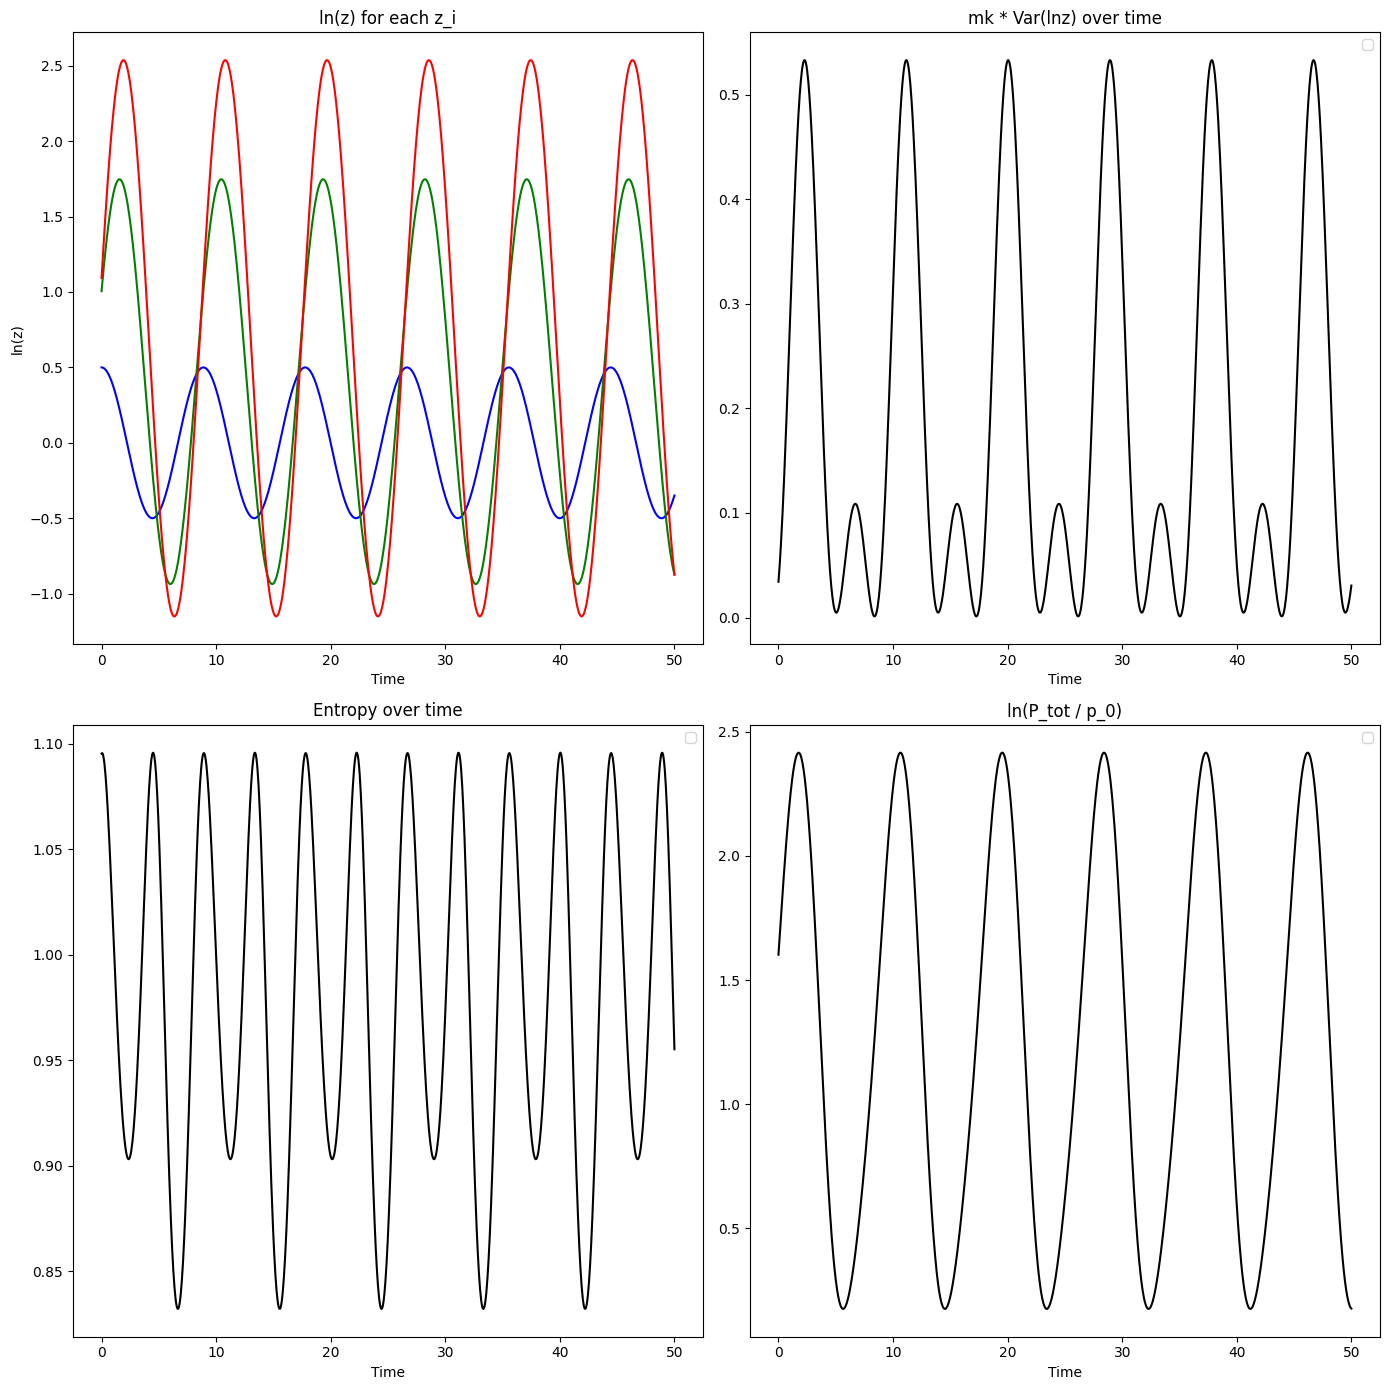

Average of mk * Var(lnz): 0.1902021086335857
Average of entropy: 0.979363939607268
Average of ln(P_tot / p01): 1.2682626545039752
Sum of averages: -0.0986966062631216


In [6]:
# Figure 2

# Input parameters
k = 0.5  # Spring constant-like parameter
z01, z02, z03 = 1.0, 1.5, 2.0  # Initial values for z
p01, p02, p03 = 10.0, 10.0, 10.0  # Initial values for p
m = 1.0  # Mass-like parameter

# Derived parameters
omega = np.sqrt(k / m)  # Angular frequency

# Time array
t = np.linspace(0, 50, 1000)  # Time from 0 to 50 with 1000 points

# Initial conditions for three z_i
A1, B1 = 0.5, 0.0  # Amplitudes for z1
A2, B2 = 0.6, 1.2  # Amplitudes for z2
A3, B3 = 0.4, 1.8  # Amplitudes for z3

# Solutions for lnz_i
lnz1 = A1 * np.cos(omega * t) + B1 * np.sin(omega * t) + np.log(z01)
lnz2 = A2 * np.cos(omega * t) + B2 * np.sin(omega * t) + np.log(z02)
lnz3 = A3 * np.cos(omega * t) + B3 * np.sin(omega * t) + np.log(z03)

# Solutions for z_i
z1 = np.exp(lnz1)
z2 = np.exp(lnz2)
z3 = np.exp(lnz3)

# Calculate variance of lnz_i and mk * var(lnz)
k_var_lnz = m * k * np.var([lnz1, lnz2, lnz3], axis=0)
k_var_avg = np.mean(k_var_lnz)

# Solutions for p_i
p1 = np.exp(lnz1) * p01 / z01
p2 = np.exp(lnz2) * p02 / z02
p3 = np.exp(lnz3) * p03 / z03
P_tot = p1 + p2 + p3

# Calculate q_i and entropy
q1 = p1 / P_tot
q2 = p2 / P_tot
q3 = p3 / P_tot
entropy = -(q1 * np.log(q1) + q2 * np.log(q2) + q3 * np.log(q3))
entropy_avg = np.mean(entropy)

# Plotting the results
plt.figure(figsize=(14, 14))

# Plot lnz for each z_i
plt.subplot(2, 2, 1)
plt.plot(t, lnz1, label='lnz_1', color='blue')
plt.plot(t, lnz2, label='lnz_2', color='green')
plt.plot(t, lnz3, label='lnz_3', color='red')
plt.title('ln(z) for each z_i')
plt.xlabel('Time')
plt.ylabel('ln(z)')


# Plot mk * Var(lnz)
plt.subplot(2, 2, 2)
plt.plot(t, k_var_lnz, color='black')
plt.title('mk * Var(lnz) over time')
plt.xlabel('Time')

plt.legend()

# Plot entropy
plt.subplot(2, 2, 3)
plt.plot(t, entropy, color='black')
plt.title('Entropy over time')
plt.xlabel('Time')

plt.legend()

# Plot ln(P_tot / p01)
plt.subplot(2, 2, 4)
plt.plot(t, np.log(P_tot / p01), color='black')
plt.title('ln(P_tot / p_0)')
plt.xlabel('Time')

plt.legend()

plt.tight_layout()
plt.show()

# Print average values and their sum
print(f"Average of mk * Var(lnz): {k_var_avg}")
print(f"Average of entropy: {entropy_avg}")
print(f"Average of ln(P_tot / p01): {np.mean(np.log(P_tot / p01))}")
print(f"Sum of averages: {k_var_avg + entropy_avg - np.mean(np.log(P_tot / p01))}")
